#APS terrain analysis


Imports

In [56]:
# -*- coding: utf-8 -*-
%matplotlib inline
from __future__ import print_function

import pylab as plt
import datetime
import numpy as np
import numpy.ma as ma
from linecache import getline

plt.rcParams['figure.figsize'] = (14, 6)

In [57]:
dem_file = r".\Data\dtm25_6800_1.asc"
z = np.loadtxt(dem_file, dtype=int, skiprows=6)

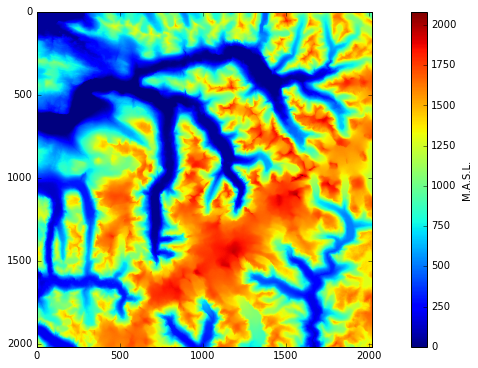

In [58]:
plt.imshow(z)
plt.colorbar(label="M.A.S.L.")

In [59]:
hist, bin_edges = np.histogram(z, bins=[0, 300, 600, 900, 1200, 3000])
hist_perc = hist / (z.shape[1]*z.shape[0] )*100.0

<Container object of 5 artists>

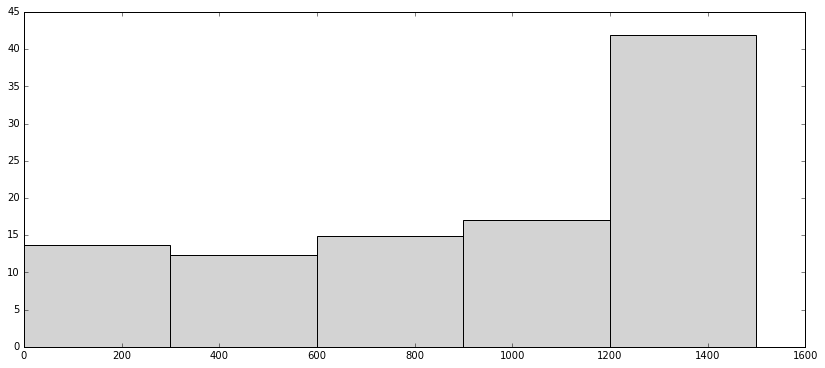

In [60]:
plt.bar(bin_edges[:-1], hist_perc, width=300, color='lightgrey')

We can calculate area above tree-line by combining elevations with a treeline mask.

## Calculate slope and aspect

In [64]:
# Needed for numpy conversions
deg2rad = np.pi / 180.0
rad2deg = 180.0 / np.pi

# Parse the header using a loop and
# the built-in linecache module
hdr = [getline(dem_file, i) for i in range(1,7)]
values = [float(h.split(" ")[-1].strip()) \
 for h in hdr]
cols,rows,lx,ly,cell,nd = values
xres = cell
yres = cell * -1

# Load the dem into a numpy array
#arr = np.loadtxt(source, skiprows=6)

# Exclude 2 pixels around the edges which are usually NODATA.
# Also set up structure for a 3x3 window to process the slope
# throughout the grid
window = []
for row in range(3):
    for col in range(3):
        window.append(z[row:(row + z.shape[0] - 2), \
        col:(col + z.shape[1] - 2)])

# Process each cell
x = ((z * window[0] + z * window[3] + z * \
 window[3] + z * window[6]) - \
  (z * window[2] + z * window[5] + z * \
 window[5] + z * window[8])) / (8.0 * xres * scale);

y = ((z * window[6] + z * window[7] + z * window[7] + \
  z * window[8]) - (z * window[0] + z * window[1] + \
  z * window[1] + z * window[2])) / (8.0 * yres * scale);

# Calculate slope  
slope = 90.0 - np.arctan(np.sqrt(x*x + y*y)) * rad2deg

# Calculate aspect
aspect = np.arctan2(x, y)

ValueError: operands could not be broadcast together with shapes (2018,2018) (2016,2016) 